# computação Quantica
## Aula 4

### Esfera de Bloch no Qiskit

Primero tive que descobrir como utilizar o conda environment no vscode  
já que a documentação do qiskit recomenda seu uso dessa forma  
estou utilizando o environment Quantun_python

In [2]:
import numpy as np
from qiskit import *
from qiskit.visualization import plot_bloch_multivector
import qiskit.quantum_info as qi
from scipy import linalg as lng
import matplotlib.pyplot as plt



In [3]:
# Definindo os estados da base computacional
v0 = np.array( [[1],[0]] )
v1 = np.array( [[0],[1]] )

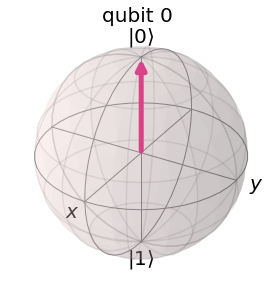

In [4]:
# Visualizando os estados da base na esfera de Bloch
## Primeiro é preciso transformar os estados que estão como array em um objeto do tipo state vector
state = qi.Statevector(v0)
## Depois é possível plotar o estado na esfera
plot_bloch_multivector(state)



Todo e qualquer estado de um qubit pode ser representado na esfera de bloch

In [5]:
theta = np.pi/5
phi = np.pi/8
psi = np.cos(theta/2)*v0 + np.sin(theta/2)*np.exp(1j*phi)*v1

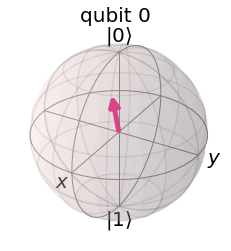

In [6]:
state = qi.Statevector(psi)
plot_bloch_multivector(state)

alterando os valores de theta e phi podemos ver como cada ângulo influencia na posição do vetor

### Utilizando as portas lógicas no Qiskit

In [7]:
# Aplicação de uma porta Hadamart
## Definindo a matriz Hadamart
Had = (1/np.sqrt(2))*np.array([[1,1],[1,-1]])
print(Had) # output é uma matriz que define o hadamart

[[ 0.70710678  0.70710678]
 [ 0.70710678 -0.70710678]]


In [8]:
# Definindo uma operação Hadamart 
## U(t) = e^(-i.H.t/h_cortado)  
U = lng.expm(-1j*Had*0) # operação da porta Hadamart
# foi utilizada a biblioteca linalg do scipy para realizar o exponencial por uma matriz

In [9]:
# Aplicação de uma porta BitFlip
## Definindo a matriz de bitflip
X = np.array([[0,1],[1,0]])
print(X)


[[0 1]
 [1 0]]


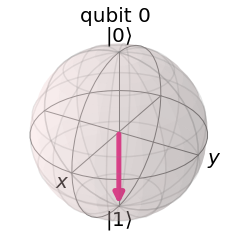

In [10]:
U = lng.expm(-1j*X*np.pi/2)  # operação da porta BitFlip quando o t = pi/2
state = qi.Statevector(U@v0) # quando a operação é feita sobre o estado v0 vemos que ela altera de v0 para v1
plot_bloch_multivector(state)

In [11]:
# dinâmica dos estados 
psi11 = []
psi21 = []
time = []
for k in range(640):
    t = 0.01*k
    U = lng.expm(1j*X*t)
    psi = U@v0

    time.append(t)
    psi11.append(np.abs(psi[0,0]))
    psi21.append(np.abs(psi[1,0]))


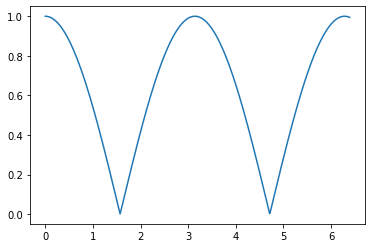

In [12]:
plt.plot(time,psi11)
# |psi> = a|0> + b|1>
# para |0> temos a = 1 e b = 0
# aqui podemos ver como a operação de bit flip altera o valor de a com passar do tempo 
# podemos ver como ele começa em 1 e em certo valor t tem o valor 0 

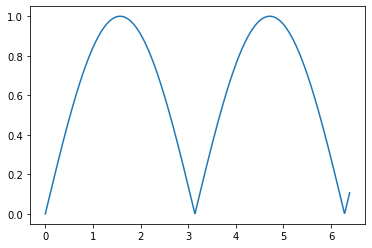

In [13]:
plt.plot(time,psi21)
# aqui podemos ver o valor de b começando em 0 e com o passar do tempo alterando para 1 